<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#標準入力" data-toc-modified-id="標準入力-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>標準入力</a></span></li><li><span><a href="#ソート" data-toc-modified-id="ソート-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ソート</a></span><ul class="toc-item"><li><span><a href="#sort-と-sorted" data-toc-modified-id="sort-と-sorted-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>sort と sorted</a></span></li><li><span><a href="#sort-keyの指定方法" data-toc-modified-id="sort-keyの指定方法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>sort keyの指定方法</a></span></li></ul></li><li><span><a href="#ループ" data-toc-modified-id="ループ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ループ</a></span><ul class="toc-item"><li><span><a href="#for-と-while" data-toc-modified-id="for-と-while-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>for と while</a></span></li><li><span><a href="#range(len(A)-vs-A" data-toc-modified-id="range(len(A)-vs-A-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>range(len(A) vs A</a></span></li></ul></li><li><span><a href="#リスト" data-toc-modified-id="リスト-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>リスト</a></span><ul class="toc-item"><li><span><a href="#リストの初期化" data-toc-modified-id="リストの初期化-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>リストの初期化</a></span></li><li><span><a href="#リストの初期化（二次元配列）" data-toc-modified-id="リストの初期化（二次元配列）-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>リストの初期化（二次元配列）</a></span></li><li><span><a href="#リストへの追加" data-toc-modified-id="リストへの追加-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>リストへの追加</a></span></li></ul></li><li><span><a href="#それぞれの処理速度" data-toc-modified-id="それぞれの処理速度-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>それぞれの処理速度</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.xkcd()

In [3]:
df = pd.read_csv('../data/record.csv', index_col=0)
df2 = pd.read_csv('../data/record2.csv', index_col=0)
df = pd.concat([df, df2], ignore_index=True)

In [4]:
df.head()

,time,exp,func,param1,param2
0,401.37600,stdin,input(),NaN,NaN
1,411.31210,stdin,input(),NaN,NaN
2,393.02896,stdin,input(),NaN,NaN
3,400.05804,stdin,input(),NaN,NaN
4,400.71800,stdin,input(),NaN,NaN


# 標準入力

In [5]:
df_stdin = df[df['exp'] == 'stdin']

In [6]:
df_stdin.groupby('func').mean()

,time,param1,param2
func,,,
input(),392.407097,NaN,NaN
sys.stdin.readline(),37.091110,NaN,NaN


In [7]:
df_stdin.groupby('func').std()

,time,param1,param2
func,,,
input(),24.367022,NaN,NaN
sys.stdin.readline(),1.885746,NaN,NaN


Text(0,0.5,'processing time (ms)')

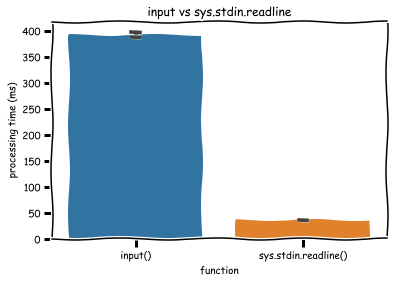

In [8]:
ax = sns.barplot(x='func', y='time', data=df_stdin, capsize=.05)
ax.set_title('input vs sys.stdin.readline')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

# ソート

## sort と sorted

In [9]:
df_sort1 = df[df['exp'] == 'sort1']

In [10]:
df_sort1.groupby(['func', 'param1', 'param2']).mean()

time
func     param1    param2               
sort()   1000000.0 10000.0     76.210405
                   1000000.0   88.545600
sorted() 1000000.0 10000.0    114.773293
                   1000000.0  127.033221

In [11]:
df_sort1.groupby(['func', 'param1', 'param2']).std()

time
func     param1    param2              
sort()   1000000.0 10000.0    41.169606
                   1000000.0  56.983844
sorted() 1000000.0 10000.0     4.440005
                   1000000.0   7.515123

In [12]:
df_sort1_1000000 = df_sort1[df_sort1['param2'] == 1000000]

Text(0,0.5,'processing time (ms)')

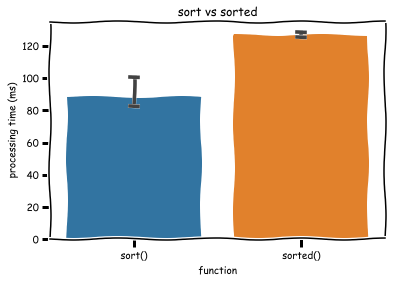

In [13]:
ax = sns.barplot(x='func', y='time', data=df_sort1_1000000, capsize=.05)
ax.set_title('sort vs sorted')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

## sort keyの指定方法

In [14]:
df_sort2 = df[df['exp'] == 'sort2']

In [15]:
df_sort2.groupby(['func', 'param1', 'param2']).mean()

time
func                          param1    param2               
A.sort(key=itemgetter(1))     1000000.0 10000.0    487.467050
                                        1000000.0  521.917311
A.sort(key=lambda x: x[1])    1000000.0 10000.0    595.339832
                                        1000000.0  641.175783
sorted(A, key=itemgetter(1))  1000000.0 10000.0    562.883615
                                        1000000.0  588.170863
sorted(A, key=lambda x: x[1]) 1000000.0 10000.0    673.830231
                                        1000000.0  688.453029

In [16]:
df_sort2.groupby(['func', 'param1', 'param2']).std()

time
func                          param1    param2              
A.sort(key=itemgetter(1))     1000000.0 10000.0    48.101942
                                        1000000.0   4.919409
A.sort(key=lambda x: x[1])    1000000.0 10000.0    56.479460
                                        1000000.0  29.699946
sorted(A, key=itemgetter(1))  1000000.0 10000.0     9.444574
                                        1000000.0  15.324249
sorted(A, key=lambda x: x[1]) 1000000.0 10000.0    31.320892
                                        1000000.0  35.245687

In [17]:
df_sort2_1000000 = df_sort2[df_sort2['param2'] == 1000000]

[Text(0,0,'sort, lambda'),
 Text(0,0,'sort, itemgetter'),
 Text(0,0,'sorted, lambda'),
 Text(0,0,'sorted, itemgetter')]

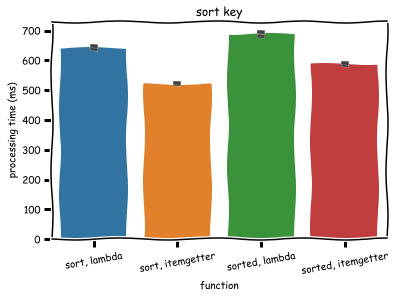

In [18]:
ax = sns.barplot(x='func', y='time', data=df_sort2_1000000, capsize=.05)
ax.set_title('sort key')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')
xlabels = ['sort, lambda', 'sort, itemgetter', 'sorted, lambda', 'sorted, itemgetter']
ax.set_xticklabels(xlabels, rotation=10)

# ループ

## for と while

In [19]:
df_loop1 = df[df['exp'] == 'loop1']

In [20]:
df_loop1.groupby(['func', 'param1']).mean()

time  param2
func              param1                        
for _ in range(N) 100000.0      2.364513     NaN
                  1000000.0    20.631151     NaN
                  10000000.0  219.355569     NaN
for i in range(N) 100000.0      2.463678     NaN
                  1000000.0    25.664727     NaN
                  10000000.0  246.598666     NaN
while i < N       100000.0      5.257696     NaN
                  1000000.0    51.364657     NaN
                  10000000.0  534.530075     NaN

In [21]:
df_loop1.groupby(['func', 'param1']).std()

time  param2
func              param1                       
for _ in range(N) 100000.0     0.502480     NaN
                  1000000.0    0.893255     NaN
                  10000000.0  10.724498     NaN
for i in range(N) 100000.0     0.177006     NaN
                  1000000.0    0.937604     NaN
                  10000000.0   9.320138     NaN
while i < N       100000.0     0.206713     NaN
                  1000000.0    1.449672     NaN
                  10000000.0  13.632132     NaN

In [22]:
df_loop1_1000000 = df_loop1[df_loop1['param1'] == 1000000]

Text(0,0.5,'processing time (ms)')

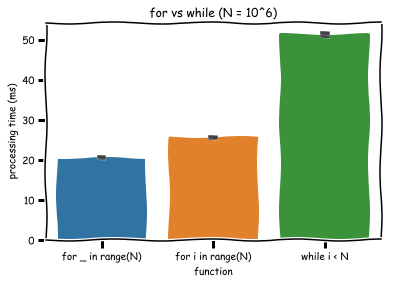

In [23]:
ax = sns.barplot(x='func', y='time', data=df_loop1_1000000, capsize=.05)
ax.set_title('for vs while (N = 10^6)')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

[Text(0,0,'10^5'), Text(0,0,'10^6'), Text(0,0,'10^7')]

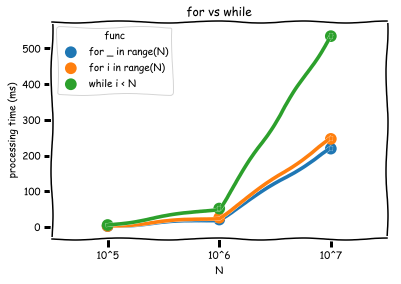

In [24]:
ax = sns.pointplot(x='param1', y='time', hue='func', data=df_loop1)
ax.set_title('for vs while')
ax.set_xlabel('N')
ax.set_ylabel('processing time (ms)')
xlabels = ['10^5', '10^6', '10^7']
ax.set_xticklabels(xlabels)

## range(len(A) vs A

In [25]:
df_loop2 = df[df['exp'] == 'loop2']

In [26]:
df_loop2.groupby(['func', 'param1']).mean()

time  param2
func                   param1                        
for a in A             100000.0      1.164774     NaN
                       1000000.0    11.852292     NaN
                       10000000.0  119.575507     NaN
for i in range(len(A)) 100000.0      4.094263     NaN
                       1000000.0    41.144408     NaN
                       10000000.0  399.473000     NaN

In [27]:
df_loop2.groupby(['func', 'param1']).std()

time  param2
func                   param1                      
for a in A             100000.0    0.051819     NaN
                       1000000.0   0.568733     NaN
                       10000000.0  4.688826     NaN
for i in range(len(A)) 100000.0    0.399529     NaN
                       1000000.0   1.510472     NaN
                       10000000.0  7.656674     NaN

In [28]:
df_loop2_1000000 = df_loop2[df_loop2['param1'] == 1000000]

Text(0,0.5,'processing time (ms)')

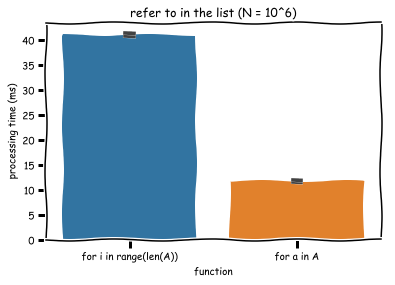

In [29]:
ax = sns.barplot(x='func', y='time', data=df_loop2_1000000, capsize=.05)
ax.set_title('refer to in the list (N = 10^6)')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

[Text(0,0,'10^5'), Text(0,0,'10^6'), Text(0,0,'10^7')]

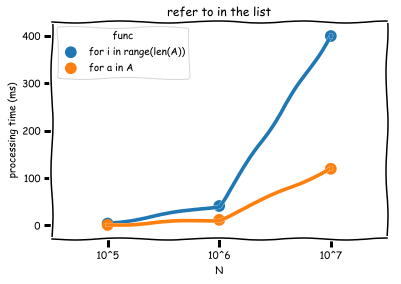

In [30]:
ax = sns.pointplot(x='param1', y='time', hue='func', data=df_loop2)
ax.set_title('refer to in the list')
ax.set_xlabel('N')
ax.set_ylabel('processing time (ms)')
xlabels = ['10^5', '10^6', '10^7']
ax.set_xticklabels(xlabels)

# リスト

In [31]:
df_list = df[df['exp'] == 'list']

In [32]:
df_list.groupby(['func', 'param1']).mean()

time  param2
func                      param1                         
A = [i for i in range(N)] 100000.0       5.538233     NaN
                          1000000.0     65.839777     NaN
                          10000000.0   676.759148     NaN
A[i] = i                  100000.0       6.102700     NaN
                          1000000.0     70.978582     NaN
                          10000000.0   741.976015     NaN
[None for _ in range(N)]  100000.0       3.832623     NaN
                          1000000.0     41.175010     NaN
                          10000000.0   411.942534     NaN
[None] * N                100000.0       0.304700     NaN
                          1000000.0      5.156298     NaN
                          10000000.0    46.741854     NaN
append()                  100000.0       9.413639     NaN
                          1000000.0    103.990430     NaN
                          10000000.0  1061.116252     NaN

In [33]:
df_list.groupby(['func', 'param1']).std()

time  param2
func                      param1                       
A = [i for i in range(N)] 100000.0     0.252392     NaN
                          1000000.0    3.205399     NaN
                          10000000.0  12.989022     NaN
A[i] = i                  100000.0     0.447720     NaN
                          1000000.0    3.931961     NaN
                          10000000.0  15.813225     NaN
[None for _ in range(N)]  100000.0     0.153143     NaN
                          1000000.0    2.057011     NaN
                          10000000.0  18.657456     NaN
[None] * N                100000.0     0.022648     NaN
                          1000000.0    0.413444     NaN
                          10000000.0   3.716402     NaN
append()                  100000.0     0.369924     NaN
                          1000000.0    2.629201     NaN
                          10000000.0  28.153333     NaN

## リストの初期化

In [34]:
df_list1 = df_list.query('func == "[None] * N" or func == "[None for _ in range(N)]"')

In [35]:
df_list1_1000000 = df_list1[df_list1['param1'] == 1000000]

Text(0,0.5,'processing time (ms)')

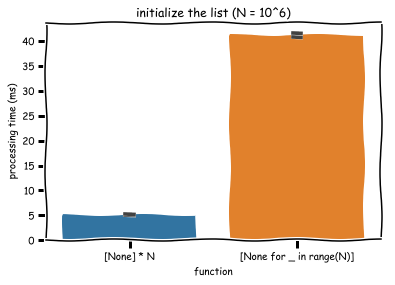

In [36]:
ax = sns.barplot(x='func', y='time', data=df_list1_1000000, capsize=.05)
ax.set_title('initialize the list (N = 10^6)')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

[Text(0,0,'10^5'), Text(0,0,'10^6'), Text(0,0,'10^7')]

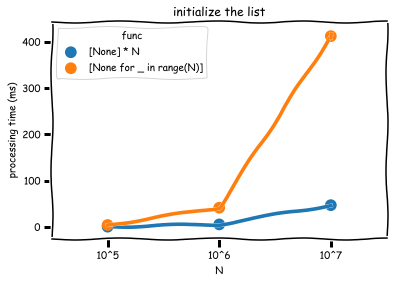

In [37]:
ax = sns.pointplot(x='param1', y='time', hue='func', data=df_list1)
ax.set_title('initialize the list')
ax.set_xlabel('N')
ax.set_ylabel('processing time (ms)')
xlabels = ['10^5', '10^6', '10^7']
ax.set_xticklabels(xlabels)

## リストの初期化（二次元配列）

In [38]:
df_list3 = df[df['exp'] == 'list3']

In [39]:
df_list3.groupby(['func', 'param1']).mean()

,,time,param2
func,param1,,
[[None for _ in range(N)] for _ in range(N)],1000.0,38.455598,NaN
[[None] * N for _ in range(N)],1000.0,3.073210,NaN


In [40]:
df_list3.groupby(['func', 'param1']).std()

,,time,param2
func,param1,,
[[None for _ in range(N)] for _ in range(N)],1000.0,4.804763,NaN
[[None] * N for _ in range(N)],1000.0,1.020254,NaN


[Text(0,0,'[[None] * N for _ in range(N)]'),
 Text(0,0,'[[None for _ in range(N)] for _ in range(N)]')]

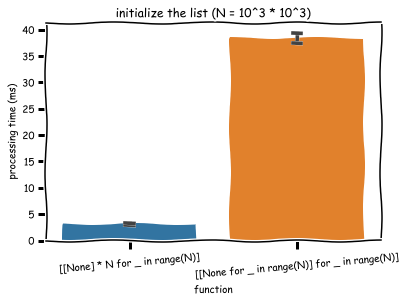

In [41]:
ax = sns.barplot(x='func', y='time', data=df_list3, capsize=.05)
ax.set_title('initialize the list (N = 10^3 * 10^3)')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')
xlabels = ['[[None] * N for _ in range(N)]', '[[None for _ in range(N)] for _ in range(N)]']
ax.set_xticklabels(xlabels, rotation=5)

## リストへの追加

In [42]:
df_list2 = df_list.query('func == "append()" or func == "A[i] = i" or func  == "A = [i for i in range(N)]"')

In [43]:
df_list2_1000000 = df_list2[df_list2['param1'] == 1000000]

Text(0,0.5,'processing time (ms)')

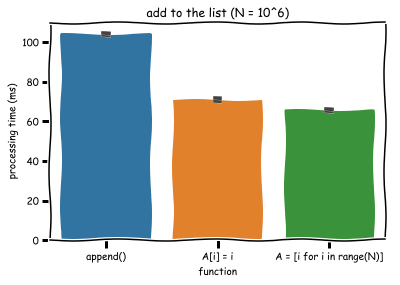

In [44]:
ax = sns.barplot(x='func', y='time', data=df_list2_1000000, capsize=.05)
ax.set_title('add to the list (N = 10^6)')
ax.set_xlabel('function')
ax.set_ylabel('processing time (ms)')

[Text(0,0,'10^5'), Text(0,0,'10^6'), Text(0,0,'10^7')]

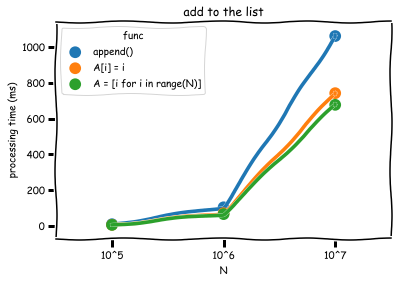

In [45]:
ax = sns.pointplot(x='param1', y='time', hue='func', data=df_list2)
ax.set_title('add to the list')
ax.set_xlabel('N')
ax.set_ylabel('processing time (ms)')
xlabels = ['10^5', '10^6', '10^7']
ax.set_xticklabels(xlabels)

# それぞれの処理速度

In [46]:
df_stdin = df.query('func == "sys.stdin.readline()"')
df_sort1 = df.query('func == "sort()" and param2 == 1000000')
df_sort2 = df.query('func == "A.sort(key=itemgetter(1))" and param2 == 1000000')
df_loop1 = df.query('func == "for _ in range(N)" and param1 == 1000000')
df_list1 = df.query('func == "[None] * N" and param1 == 1000000')
df_list3 = df.query('func == "[[None] * N for _ in range(N)]"')
df_loop2 = df.query('func == "for a in A" and param1 == 1000000')
df_list2 = df.query('func == "A = [i for i in range(N)]" and param1 == 1000000')

Text(0.5,0,'processing time (ms)')

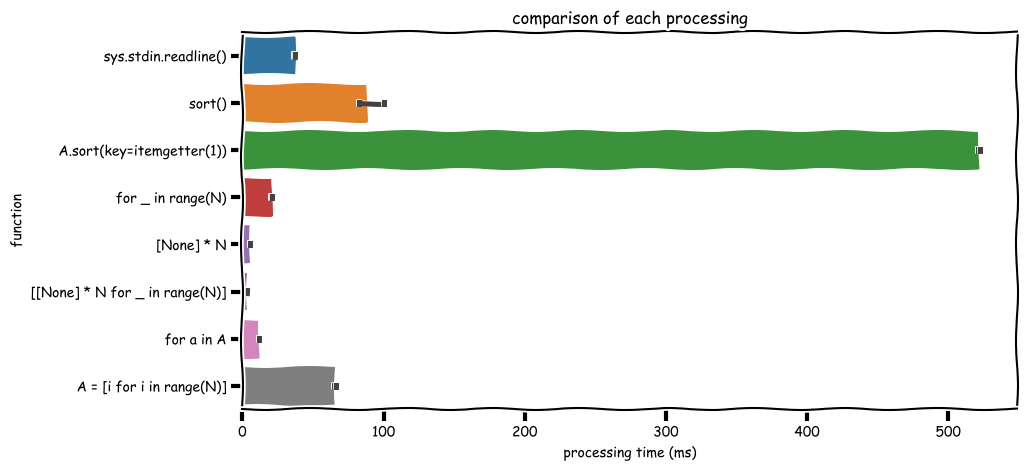

In [47]:
df_s = pd.concat([df_stdin, df_sort1, df_sort2, df_loop1, df_list1, df_list3, df_loop2, df_list2], ignore_index=True)
plt.figure(figsize=(10, 5),dpi=100)
ax = sns.barplot(y='func', x='time', data=df_s, capsize=.05)
ax.set_title('comparison of each processing')
ax.set_ylabel('function')
ax.set_xlabel('processing time (ms)')
# xlabels = ['stdin', 'sort', 'sort key', 'for loop', 'initialize list', 'initialize (2D)', 'refer list', 'add list']
# ax.set_xticklabels(xlabels, rotation=0)

Text(0.5,0,'processing time (ms)')

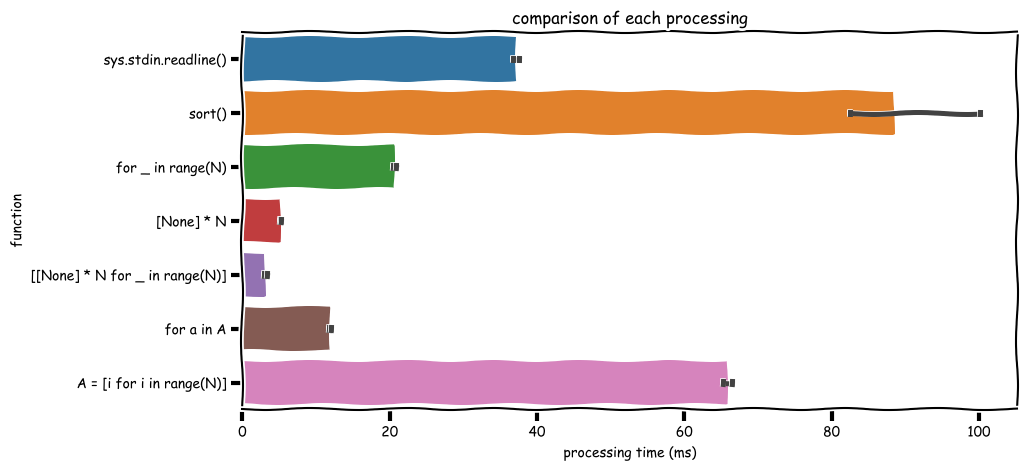

In [48]:
df_s2 = pd.concat([df_stdin, df_sort1, df_loop1, df_list1, df_list3, df_loop2, df_list2], ignore_index=True)
plt.figure(figsize=(10, 5),dpi=100)
ax = sns.barplot(y='func', x='time', data=df_s2, capsize=.05)
ax.set_title('comparison of each processing')
ax.set_ylabel('function')
ax.set_xlabel('processing time (ms)')
# xlabels = ['stdin', 'sort', 'for loop', 'initialize list', 'initialize (2D)', 'refer list', 'add list']
# ax.set_xticklabels(xlabels, rotation=0)